In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing necessary libraries

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Reading the sample data file

In [275]:
df = pd.read_excel("/content/drive/MyDrive/Societe Generale/data.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [276]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Type,Issue,Resolution
0,FTR,File from Upstream Application is not reaching...,FTR configuration (EDI) was not updated in the...
1,NaN,Hyperion Essbase script was creating the file ...,2 jobs were creating 2 files at the same time ...
2,NaN,Files transferred between systems are arriving...,Check for data integrity during transfer. Vali...
3,NaN,Upstream to downstream FTR failed due to Keys.,"SSH keys mismatch, dev team sent the public SS..."
4,NaN,Files were created in upstream but 0 kb files ...,Autosys team corrected the connection at auto...
...,...,...,...
79,NaN,Cloud services fail to comply with industry r...,Choose cloud providers that offer compliance c...
80,NaN,Challenges arise when migrating from one cloud...,Design applications for portability and avoid ...
81,NaN,Unexpectedly high cloud service costs or diffi...,Set up cost tracking and monitoring tools.\nIm...
82,NaN,Challenges in integrating cloud services with ...,Ensure API compatibility and version control.\...


In [277]:
df["Type"].fillna(method ='ffill', inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Nan values are filled with the before values**

In [278]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Type,Issue,Resolution
0,FTR,File from Upstream Application is not reaching...,FTR configuration (EDI) was not updated in the...
1,FTR,Hyperion Essbase script was creating the file ...,2 jobs were creating 2 files at the same time ...
2,FTR,Files transferred between systems are arriving...,Check for data integrity during transfer. Vali...
3,FTR,Upstream to downstream FTR failed due to Keys.,"SSH keys mismatch, dev team sent the public SS..."
4,FTR,Files were created in upstream but 0 kb files ...,Autosys team corrected the connection at auto...
...,...,...,...
79,Cloud services,Cloud services fail to comply with industry r...,Choose cloud providers that offer compliance c...
80,Cloud services,Challenges arise when migrating from one cloud...,Design applications for portability and avoid ...
81,Cloud services,Unexpectedly high cloud service costs or diffi...,Set up cost tracking and monitoring tools.\nIm...
82,Cloud services,Challenges in integrating cloud services with ...,Ensure API compatibility and version control.\...


In [279]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Type          object
Issue         object
Resolution    object
dtype: object

In [280]:
incident_response = {}
for i in range(df.shape[0]):
  incident_response[df['Issue '][i]] = df['Resolution'][i]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [281]:
incident_response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'File from Upstream Application is not reaching the downstream application folder.': 'FTR configuration (EDI) was not updated in the downstream application post informatica migration. The config was updated to resolve this issue.',
 'Hyperion Essbase script was creating the file in source folder but failed to push it to the target folder.': '2 jobs were creating 2 files at the same time which is creating deadlock while pushing the file in FTR. Jobs were rescheduled to fix this issue.',
 'Files transferred between systems are arriving corrupted or incomplete': 'Check for data integrity during transfer. Validate checksums or hashes before and after transfer. Ensure that the file transfer method (FTP, SFTP, HTTP) supports binary transfers for non-text files. If the issue persists, consider compressing the file before transfer to mitigate data corruption',
 'Upstream to downstream FTR  failed due to Keys.': 'SSH keys mismatch, dev team sent the public SSH keys which FTR team updated at th

In [282]:
incidence_list = df['Issue '].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [283]:
incidence_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['File from Upstream Application is not reaching the downstream application folder.',
 'Hyperion Essbase script was creating the file in source folder but failed to push it to the target folder.',
 'Files transferred between systems are arriving corrupted or incomplete',
 'Upstream to downstream FTR  failed due to Keys.',
 'Files were created in upstream but 0 kb files were sent to downstream.',
 "Transferred files are reaching the destination but don't have the correct permissions, causing access issues",
 'Files transferred between systems are being accessed by unauthorized users.',
 'File transfers fail when the system experiences high load or traffic',
 ' Files transferred between systems are not compatible due to differences in file formats.',
 'Unable to access services behind the router from the internet.',
 'Wi-Fi coverage is limited to a certain area.',
 'Devices on the network have duplicate IP addresses.',
 'Devices can connect to the network but cannot access the internet.'

## Data Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


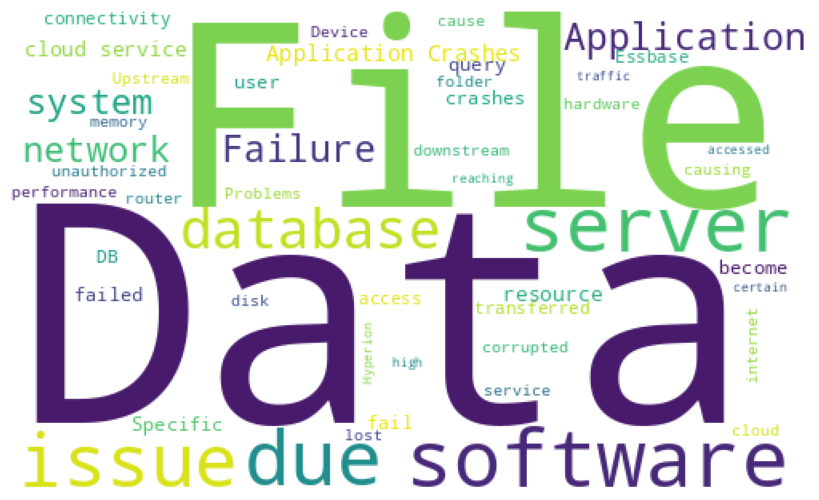

In [284]:
# Possible words in the incidence text
text_i = ''
for i in range(df.shape[0]):
  text_i += df['Issue '][i]
  text_i += ' '

wordcloud = WordCloud(width=500, height=300, background_color='white', max_words = 50).generate(text_i)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


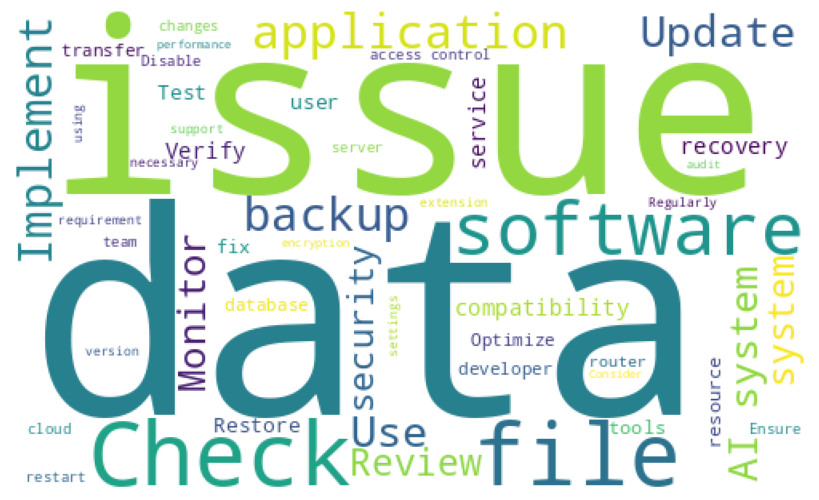

In [285]:
# Possible words in the resolution text
text_r = ''
for i in range(df.shape[0]):
  text_r += df['Resolution'][i]
  text_r += ' '

wordcloud = WordCloud(width=500, height=300, background_color='white', max_words = 50).generate(text_r)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Approach 1

In [286]:
dict1 = {}
for i in range(df.shape[0]):
  if df['Type'][i] not in dict1:
    dict1[df['Type'][i]] = {}
for i in range(df.shape[0]):
  dict1[df['Type'][i]][df['Issue '][i]] = df['Resolution'][i]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [287]:
dict1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'FTR': {'File from Upstream Application is not reaching the downstream application folder.': 'FTR configuration (EDI) was not updated in the downstream application post informatica migration. The config was updated to resolve this issue.',
  'Hyperion Essbase script was creating the file in source folder but failed to push it to the target folder.': '2 jobs were creating 2 files at the same time which is creating deadlock while pushing the file in FTR. Jobs were rescheduled to fix this issue.',
  'Files transferred between systems are arriving corrupted or incomplete': 'Check for data integrity during transfer. Validate checksums or hashes before and after transfer. Ensure that the file transfer method (FTP, SFTP, HTTP) supports binary transfers for non-text files. If the issue persists, consider compressing the file before transfer to mitigate data corruption',
  'Upstream to downstream FTR  failed due to Keys.': 'SSH keys mismatch, dev team sent the public SSH keys which FTR team up

In [288]:
X_train, X_test, y_train, y_test = train_test_split(df['Issue '], df['Type'], test_size = 0.2, random_state=42)


vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [289]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.35294117647058826
Classification Report:
                                                                                                     precision    recall  f1-score   support

                                                                                       Application       0.00      0.00      0.00         2
                                                                                   Cloud services        1.00      1.00      1.00         1
                                                                                         Data Loss       0.00      0.00      0.00         1
                                                                                          Database       0.25      1.00      0.40         3
                                                                  Database Performance Degradation       0.00      0.00      0.00         1
                                                                                           Essbase       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

In [290]:
k = 7
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.47058823529411764
Classification Report:
                                                                                                     precision    recall  f1-score   support

                                                                                       Application       0.40      1.00      0.57         2
                                                                                   Cloud services        1.00      1.00      1.00         1
                                                                                      Data Breach        0.00      0.00      0.00         0
                                                                                         Data Loss       0.00      0.00      0.00         1
                                                                                          Database       0.50      1.00      0.67         3
                                                                  Database Performance Degradation       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dis

In [291]:
clf = LogisticRegression(max_iter=1000, multi_class='ovr')
clf.fit(X_train_tfidf, y_train)


y_pred = clf.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.4117647058823529
Classification Report:
                                                                                                     precision    recall  f1-score   support

                                                                                       Application       0.50      0.50      0.50         2
                                                                                   Cloud services        1.00      1.00      1.00         1
                                                                                         Data Loss       0.00      0.00      0.00         1
                                                                                          Database       0.30      1.00      0.46         3
                                                                  Database Performance Degradation       0.00      0.00      0.00         1
                                                                                           Essbase       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [292]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train_tfidf, y_train)


y_pred = clf.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.5294117647058824
Classification Report:
                                                                                                     precision    recall  f1-score   support

                                                                                       Application       1.00      0.50      0.67         2
                                                                                   Cloud services        1.00      1.00      1.00         1
                                                                                         Data Loss       0.00      0.00      0.00         1
                                                                                          Database       0.33      1.00      0.50         3
                                                                  Database Performance Degradation       0.00      0.00      0.00         1
                                                                                           Essbase       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [293]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, verbose=2)

grid_search.fit(X_train_tfidf, y_train)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

In [294]:
sam_inc = pd.Series(["Files transfers fail"])
X_sample = vectorizer.transform(sam_inc)
y_pred1 = clf.predict(X_sample)
print("Given query: ", sam_inc[0])
print("Predicted category: ", y_pred1)

Given query:  Files transfers fail
Predicted category:  ['FTR']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [295]:
sam_inc = pd.Series(["Data lost due to hardware in cloud"])
X_sample = vectorizer.transform(sam_inc)
y_pred1 = clf.predict(X_sample)

print("Given query: ", sam_inc[0])
print("Predicted category: ", y_pred1)

Given query:  Data lost due to hardware in cloud
Predicted category:  ['Cloud services ']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [296]:
def preprocess(data):
  data = data.lower()
  data = data.replace('\n', " ")
  data = re.sub('[^a-zA-Z ]+', '', data)
  return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [297]:
def retrieve_documents(query, documents):
    preprocessed_query = preprocess(query)
    preprocessed_documents = [preprocess(doc) for doc in documents]
    all_texts = [preprocessed_query] + preprocessed_documents
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_texts)
    similarity_scores = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
    sorted_documents = [document for _, document in sorted(zip(similarity_scores[0], documents), reverse=True)]
    return sorted_documents[:1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [298]:
query = sam_inc[0]
res = df[df['Type'] == y_pred1[0]]
relevant_documents = retrieve_documents(query, list(res['Issue ']))
print(f"Query: '{query}'")
print("Relevant resolution:")
for i, document in enumerate(relevant_documents, start=1):
    print(f"{incident_response[document]}")
print()

Query: 'Data lost due to hardware in cloud'
Relevant resolution:
Regularly back up data to different geographic regions.
Use versioning for object storage to restore previous versions.
Implement data encryption at rest and in transit.
Test data recovery processes.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [299]:
res.to_csv("res-1.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [248]:
dict1['FTR']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'File from Upstream Application is not reaching the downstream application folder.': 'FTR configuration (EDI) was not updated in the downstream application post informatica migration. The config was updated to resolve this issue.',
 'Hyperion Essbase script was creating the file in source folder but failed to push it to the target folder.': '2 jobs were creating 2 files at the same time which is creating deadlock while pushing the file in FTR. Jobs were rescheduled to fix this issue.',
 'Files transferred between systems are arriving corrupted or incomplete': 'Check for data integrity during transfer. Validate checksums or hashes before and after transfer. Ensure that the file transfer method (FTP, SFTP, HTTP) supports binary transfers for non-text files. If the issue persists, consider compressing the file before transfer to mitigate data corruption',
 'Upstream to downstream FTR  failed due to Keys.': 'SSH keys mismatch, dev team sent the public SSH keys which FTR team updated at th

## BERT

In [210]:
pip install transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00


In [217]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

incident_text = "Failed file transfer"

resolution_texts = []
for i in range(df.shape[0]):
  resolution_texts.append(df['Resolution'][i])

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

incident_tokens = tokenizer.encode(incident_text, add_special_tokens=True)
incident_tokens_tensor = torch.tensor([incident_tokens])

with torch.no_grad():
    incident_embeddings = model(incident_tokens_tensor)[0]

incident_embedding = torch.mean(incident_embeddings, dim=1)

# Compute cosine similarity between incident and resolution embeddings
similarity_scores = []
for resolution_text in resolution_texts:
    resolution_tokens = tokenizer.encode(resolution_text, add_special_tokens=True)
    resolution_tokens_tensor = torch.tensor([resolution_tokens])

    with torch.no_grad():
        resolution_embeddings = model(resolution_tokens_tensor)[0]

    resolution_embedding = torch.mean(resolution_embeddings, dim=1)

    similarity = torch.nn.functional.cosine_similarity(incident_embedding, resolution_embedding)
    similarity_scores.append(similarity.item())

# Find the index of the most similar resolution
most_similar_index = np.argmax(similarity_scores)
recommended_resolution = resolution_texts[most_similar_index]

print("Recommended Resolution:", recommended_resolution)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Recommended Resolution: Db password was expired and reactivation the issue was resolved.
